Objectives : 
1. Obtain unbiased estimates of a model's performance
2. Diagnose the common problems of machine learning algorithms
3. Fine-tune machine learning models
4. Evaluate predictive models using different performance metrics

Streamlining workflows with pipelines :
Pipeline class in scikit is a handy tool which allows us to fit models with a arbitrary number of pre-processing steps to be applied on the data.

Breast cancer wisconsin dataset : 
The Breast Cancer Wisconsin dataset has been deposited in the UCI Machine Learning Repository,

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                               'machine-learning-databases'
                               '/breast-cancer-wisconsin/wdbc.data',
                               header=None)

In [3]:
#Data exploration
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Having a look at the data, it seems the first column contains ID, second column contains the label, whether the tumour is malignant or benign. the next 30 columns contain the features.

In [4]:
len(df.columns)

32

In [5]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:,2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

the label encoder object encodes the categorical type variable into numerical class - 0 and 1.

In [6]:
le.transform(['M','B'])

array([1, 0])

In [7]:
# Train test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

Combining transformers and estimators into a single pipeline : 
In the earlier notebooks, feature scaling was done on the dataset using StandardScaler class and then in some cases, we may have to do PCA to reduce the dimensionality of the dataset using PCA. These operations can be clubbed together in a pipeline, we need not apply fit, transform separately. 

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])

In [9]:
y_pred = pipe_lr.predict(X_test)

In [10]:
print("Test accuracy : {score}".format(score=pipe_lr.score(X_test,y_test)))

Test accuracy : 0.956140350877193


The make_pipeline function takes an arbitrary number of scikit-learn transformers (objects that support the fit and transform methods as input), followed by a scikit-learn estimator that implements the fit and predict methods. \
We can think of a scikit-learn Pipeline as a meta-estimator or wrapper around those individual transformers and estimators. \
There is no limit to the number of intermediate steps/transformers which can be put in a pipeline, the only condition is that the last one should be a estimator.

Similar to calling fit on a pipeline, pipelines also implement a predict method. If we feed a dataset to the predict call of a Pipeline object instance, the data will pass through the intermediate steps via transform calls. in the final step, the estimator object will then return a prediction on the transformed data.

Using k-fold cross-validation to assess model performance : 
IF model is too simple -> high bias -> underfitting \
if model is very complex -> high variance -> overfitting \
To find the right hyperparameters, regularization etc, we need to test our model on a holdout dataset after training before testing finally on unseen test data and deploying. \
Common cross validation techniques involve holdout cross validation techniques, k-fold cross validation. 

Holdout method : \
Usually in machine learning algorithms, we have a training dataset and test dataset. But to get the right model hyperparameters and get the right model (called model selection). \
If we use the test set to determine the hyperparameters, we will indirectly end up overfitting on the test set, that is we will find hyperparameter which precisely work well with the given test set and not work generally well on new data. hence, we need another set of data on which we can conduct our hyperparameter tuning performances. 

In holdout method , separate the data into three parts : training data, validation data and test data. \
The training set is used to train the different models and the validation set is used for model selection. \
this way, we have a test set which the model has never seen and we are more likely to get a less biased estimate with this approach. \
A disadvantage of the holdout method is that the performance estimate may
be very sensitive to how we partition the training set into the training and
validation subsets; the estimate will vary for different samples of the data. 

K-fold cross validation technique: \
In k-fold cross validation, we split the training data into k folds. k-1 folds are used for training and the remaining fold is used for validation. This procedure is repeated k times and we get k estimates. \
We then calculate the average performance of the models based on the different, independent folds to obtain a performance estimate that is less sensitive to the sub-partitioning of the training data compared to the holdout method.

Once we have found satisfactory hyperparameter values, we can retrain the model on the full training dataset. The reason for training on the full training dataset after k-fold cross-validation is that providing more training samples to a learning algorithm usually results in a more accurate and robust model.

once we the estimates from the k-fold cross validation, we compute the final estimate as average of all the estimates. a good number for k based on empirical evidences is 10. we split the dataset into 10 folds and use the 10 estimates obtained to compute the final estimate.

However, if we are working with relatively small training sets, it can be useful
to increase the number of folds. If we increase the value of k, more training data
will be used in each iteration, which results in a lower bias towards estimating the generalization performance by averaging the individual model estimates. \
However, large values of k will also increase the runtime of the cross-validation algorithm and yield estimates with higher variance, since the training folds will be more similar to each other. \
On the other hand, if we are working with large datasets, we can choose a smaller value for k, for example, k=5 , and still obtain an accurate estimate of the average performance of the model while reducing the computational cost of refitting and evaluating the model on the different folds.

A special case of k-fold cross validation : Leave one out validation,where number of folds = n [training dataset size]. so, one only sample is set aside as validation data. works well for very small datasets.

A slight improvement over k-fold cross validation is Stratified k-fold cross validation. It yields better bias and variance estimates, especially when there are classes of unequal proportions. In stratified split, the class proportions are preserved in each of the folds similar to the proportion observed in training data.


In [11]:
X_train.shape, y_train.shape

((455, 30), (455,))

In [12]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []

for k, (train,test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print("Fold : {fold}, class distribution : {dist}, accuracy : {acc}".format(fold=k+1,dist=np.bincount(y_train[train]), acc=score))






Fold : 1, class distribution : [256 153], accuracy : 0.9347826086956522
Fold : 2, class distribution : [256 153], accuracy : 0.9347826086956522
Fold : 3, class distribution : [256 153], accuracy : 0.9565217391304348
Fold : 4, class distribution : [256 153], accuracy : 0.9565217391304348
Fold : 5, class distribution : [256 153], accuracy : 0.9347826086956522
Fold : 6, class distribution : [257 153], accuracy : 0.9555555555555556
Fold : 7, class distribution : [257 153], accuracy : 0.9777777777777777
Fold : 8, class distribution : [257 153], accuracy : 0.9333333333333333
Fold : 9, class distribution : [257 153], accuracy : 0.9555555555555556
Fold : 10, class distribution : [257 153], accuracy : 0.9555555555555556


In [13]:
print("CV accuracy = {mean} +/- {std}".format(mean=np.mean(scores), std=np.std(scores)))


CV accuracy = 0.9495169082125603 +/- 0.013854294239660376


sklearn also provides a Kfold cross validation class which can help get the job done.

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = pipe_lr, X = X_train, y=y_train,cv = 10, n_jobs = 1)
print(f"CV accuracy scores: {scores}".format(scores=scores) )

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [15]:
print("CV accuracy = {mean} +/- {std}".format(mean=np.mean(scores), std=np.std(scores)))

CV accuracy = 0.9495169082125603 +/- 0.013854294239660376


we get the same results with this class also. if we observe, there is a parameter called n_jobs. This basically distributes the cross validation algorithm across cpus. if n_jobs = 1, one cpu is used. if n_jobs is set to n, n cpus are used for faster cross validation training and inference.

In [16]:
import time
start_time = time.time()
scores = cross_val_score(estimator = pipe_lr, X = X_train, y=y_train,cv = 10, n_jobs = 1)
print("time taken : ", time.time()-start_time)

time taken :  0.04630589485168457


In [17]:
import time
start_time = time.time()
scores = cross_val_score(estimator = pipe_lr, X = X_train, y=y_train,cv = 10, n_jobs = 2)
print("time taken : ", time.time()-start_time)

time taken :  1.1316478252410889


for this smaller dataset, multiple cpus actually reduces the performance. because there is an overhead for transfer of data to and from cache,which is actually causing overhead. For large datasets , we can see an increase in performance

Debugging algorithms with learning and validation curves :
Two powerful diagnostic tools - learning curve and validation curve -> helps find out whether training is happening properly [without issues of overfitting / underfitting]

sklearn has some useful functions which can be used to plot curves and help understand the problem and fix them like increase model complexity to solve underfitting, regularize , feature select or feature extract , collect more data [if possible] for solving overfitting.

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2',random_state=1)) # with regularization and no PCA
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1) # training sizes : fraction of the training set used
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores, axis=1)


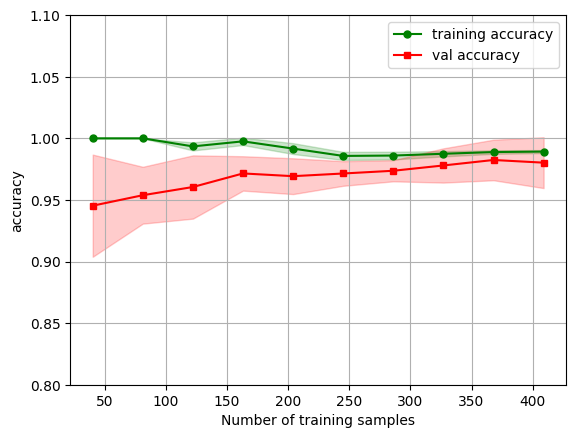

In [19]:
plt.plot(train_sizes , train_mean, color='green', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean-train_std, train_mean+train_std,alpha=0.2, color='green')
plt.plot(train_sizes , test_mean, color='red', marker='s',markersize=5,label='val accuracy')
plt.fill_between(train_sizes,test_mean-test_std, test_mean+test_std,alpha=0.2, color='red')
plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.ylim([0.8,1.1])
plt.show()

from the above picture, our model does a good job in classification for the given dataset. for number of samples < 250, there is a gap between training and validation accuracy indicating overfit. But once number of samples cross 250, we see that val accuracy is catching up with training accuracy and they are at par with required accuracy -> which is good!

Over and underfitting with validation curves :
Validation curves are similar to learning curves , but instead of plotting training and test accuracies with respect to changes in sample size, we use model hyperparameters like C [the inverse regularization parameter].

In [20]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] # C values
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name='logisticregression__C', param_range=param_range, cv=10)
print(train_scores.shape, test_scores.shape)

/Users/divyeshkanagavel/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/divyeshkanagavel/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

(6, 10) (6, 10)


/Users/divyeshkanagavel/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/divyeshkanagavel/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [21]:
print(train_scores.shape, test_scores.shape)

(6, 10) (6, 10)


In [23]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [26]:
print(train_mean.shape), print(len(param_range))

(6,)
6


(None, None)

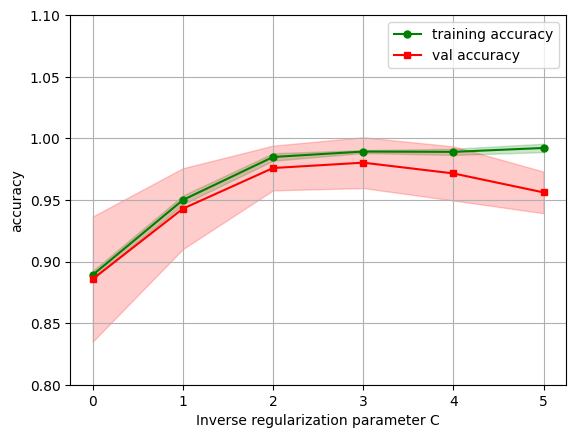

In [27]:
plt.plot(range(len(param_range)) , train_mean, color='green', marker='o',markersize=5,label='training accuracy')
plt.fill_between(range(len(param_range)),train_mean-train_std, train_mean+train_std,alpha=0.2, color='green')
plt.plot(range(len(param_range)) , test_mean, color='red', marker='s',markersize=5,label='val accuracy')
plt.fill_between(range(len(param_range)),test_mean-test_std, test_mean+test_std,alpha=0.2, color='red')
plt.grid(True)
plt.xlabel('Inverse regularization parameter C')
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.ylim([0.8,1.1])
plt.show()

as we see, more the value of C, less the regularization and hence more the overfitting as we have more weights involved in the process. the sweet spot of regularization happens to be between 2 and 3, that is 0.1 and 1

Fine tuning models via grid search:
A convenient method to find best possible hyperparameters for our model.
Grid search is a brute-force exhaustive hyperparameter search paradigm, where we specify a list of reasonable values for each hyperparameter and the search iterates through all combinations and returns the best combination of values.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C':param_range, 'svc__kernel':['linear']},
              {'svc__C':param_range, 'svc__kernel':['rbf'], 'svc__gamma':param_range}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [30]:
# test accuracy
clf = gs.best_estimator_
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
print(score)

0.9736842105263158


Although grid search is effective, it is computationally expensive sometimes the operations not feasible with the specified cpu budget. An alternative is randomized grid search which combines parameters with some degree of randomness.



Nested cross validation :
k fold cross validation with grid search is effective but there is another method which works well and is unbiased relative to the test set. 

In a nested cross valition : 
we have outer cross validation loop which splits into train and test set. then internally the train fold is split again into training and validation loop coupled with grid search to determine the hyperparameters. this model is then evaluated against the test fold in the outer loop. this is repeated again.

In [33]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2)
scores= cross_val_score(gs, X_train,y_train,cv=5,scoring='accuracy')


In [34]:
scores.shape

(5,)

In [36]:
print(np.mean(scores))
print(np.std(scores))

0.9736263736263737
0.014906219743132467


Instead of using the first approach, where we used cross val of 10 on grid search cv, this nested cross validation coupled with grid search gives a good idea of what to expect when tested on actual data.

In [37]:
# example on decision tree classifier
from sklearn.tree import DecisionTreeClassifier
param_grid = [{'max_depth':[1,2,3,4,5,6,7,None]}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),param_grid=param_grid,scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                     np.std(scores)))

CV accuracy: 0.938 +/- 0.016


SVC is better than decision tree for this dataset as we got a cross val mean score of 97.4 for kernel SVC and 93.8 percent for decision tree classifier.

Evaluation metrics for classification : 
We have been using accuracy as the metric for evaluation of model performance. Though this is a useful and intuitive metric, there are other metric which can make more sense in certain scenarios like recall, precision, F1 score etc

Confusion matrix : 
Confusion matrix is a square matrix which reports the counts of True positive, True negative, False positive, False negative. 

In [45]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)



[[71  1]
 [ 2 40]]


With the information from confusion matrix , many metrics can be calculated. \
ERR = (FP + FN) / (TP + FN + FP + TN)

ACC = (TP + TN) / (FP + FN + TP + TN)

FPR = FP / N = FP / (FP + TN)

TPR =  TP / P = TP / (TP + FN)

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)
 
In practice,a combination of both precision and recall are used, \
F1 = 2 * (PRE X RECALL) / (PRE + RECALL)





In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision score = %.3f" % precision_score(y_true=y_test, y_pred=y_pred))

Precision score = 0.976


In [47]:
print("recall score = %.3f" % recall_score(y_true=y_test, y_pred=y_pred))
print("f1 score = %.3f" % f1_score(y_true=y_test, y_pred=y_pred))

recall score = 0.952
f1 score = 0.964


In grid search CV, we passed accuracy as our scoring metric. We could pass other metrics like precision,recall as well. Also, positive label in sklearn is the one with has 1 as label. If we want 0 to be positive label, we can pass 0 as the label using make_scorer. 

In [50]:
from sklearn.metrics import make_scorer, f1_score
#label 0 - positive, label 1 - negative
scorer = make_scorer(f1_score, pos_label=0)
param_grid = [{'svc__C':param_range, 'svc__kernel':['linear']},
              {'svc__C':param_range, 'svc__kernel':['rbf'], 'svc__gamma':param_range}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                 scoring=scorer,
                cv=10)

In [51]:
gs = gs.fit(X_train, y_train)

In [52]:
print(gs.best_score_)

0.9880771478667446


In [53]:
print(gs.best_params_)

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


Receiver operating characteristic (ROC) :
Receiver Operating Characteristic (ROC) graphs are useful tools to select models for classification based on performance with respect to the FPR and TPR, which are computed by shifting the threshold of the classifier. The diagonal of the ROC graph -> random guessing. Anything which falls below the graph is worse than random guessing and anything which is above the graph -> better than random guessing.

a perfect classifier would have FR = 0 and TR = 1 and in the ROC curve, it would fall into the top left corner of the graph. Similar to ROC, we have Precision-Recall curve which is a plot of the Precision and Recall for different thresholds of the classifier.

Same breast cancer Wisconsin dataset - use only two features.

In [73]:
from sklearn.metrics import roc_curve,auc 
from scipy import interp
pipe_lr = make_pipeline(StandardScaler(),PCA(n_components=2),
LogisticRegression(penalty='l2',
                   random_state=1,
                   C=100.0))
X_train2 = X_train[:, [4, 14]] # removing the first three features to make classification harder for better visualization
cv = list(StratifiedKFold(n_splits=3).split(X_train,y_train))




In [74]:
len(cv)

3

(100,)
mean_tpr shape =  (100,)
(100,)
mean_tpr shape =  (100,)
(100,)
mean_tpr shape =  (100,)


/var/folders/pn/41l3cmvn0llckvh459j67qcw0000gn/T/ipykernel_1453/235515816.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  print(interp(mean_fpr, fpr, tpr).shape)
/var/folders/pn/41l3cmvn0llckvh459j67qcw0000gn/T/ipykernel_1453/235515816.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/pn/41l3cmvn0llckvh459j67qcw0000gn/T/ipykernel_1453/235515816.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  print(interp(mean_fpr, fpr, tpr).shape)
/var/folders/pn/41l3cmvn0llckvh459j67qcw0000gn/T/ipykernel_1453/235515816.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
/var/folders/pn/41l3cmvn0llckvh459j67qcw0000gn/T/ipykernel_1453/235515816.py:8: De

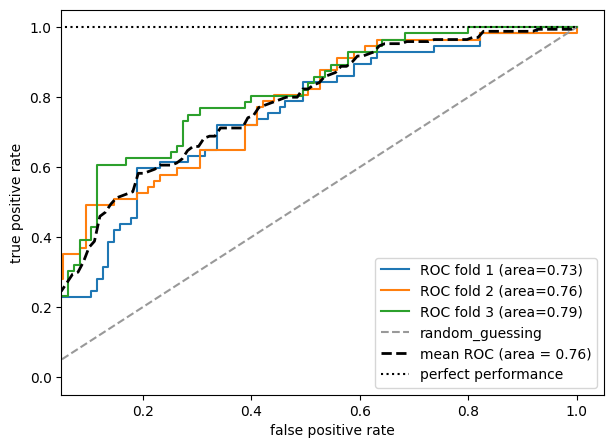

In [77]:

mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr = []
fig = plt.figure(figsize=(7,5))
for i, (train,test) in enumerate(list(cv)):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr,tpr,thresholds = roc_curve(y_train[test], probas[:,1],pos_label=1)
    print(interp(mean_fpr, fpr, tpr).shape)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    print("mean_tpr shape = ", mean_tpr.shape)
    mean_tpr[0] = 0
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label='ROC fold %d (area=%0.2f)' % (i+1, roc_auc))

plt.plot([0,1],[0,1],linestyle='--',color=(0.6,0.6,0.6),label='random_guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1
mean_auc = auc(mean_fpr,mean_tpr)
plt.plot(mean_fpr,mean_tpr, 'k--', label='mean ROC (area = %.2f)' % mean_auc,lw=2)
plt.plot([0, 0, 1],
 [0, 1, 1],
         linestyle=':',
        color='black',
        label='perfect performance')

plt.xlim([0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.show()



Scoring metrics for multiclass classification: 

One-versus-All classification (OVA) - For mutli-class classification problems with k labels , the micro-averaging of metrics like PRE is done as : \
$PRE_{micro} = \frac{TP_1 + TP_2 + ... + TP_k}{TP_1 + FP_1 + TP_2 + FP_2 + ... TP_k + FP_k}$ \
Macro-averaging is done as : \
$PRE_{macro} = \frac{PRE_1 + PRE_2 + ... PRE_k}{k}$

The weighted macro-average is calculated by weighting the score of each class label by the number of true instances when calculating the average. The weighted macro-average is useful if we are dealing with class imbalances, that is, different numbers of instances for each label.
weighted macro-average is the default mode used in scikit learn for multi-class problems. 


In [78]:
#Example when default behaviour of macro-averaging can be modified in scikit learn make_scorer method
precision_scorer = make_scorer(score_func=precision_score,greater_is_better=True,pos_label=1,average='micro')

Dealing with class imbalance : 
This happens often in real world scenarios. Often samples are overrepresented in one of the classes and other classes have few samples. Consider breast cancer dataset, if 90 percent of patients are healthy, means even if we guessed 0 for all labels[ie no cancer],  we will have 90 percent accuracy, not because we have a good estimate,but just because the dataset is skewed in favor of healthy patients. So, any model which has accuracy of less than 90 percent is not useful. The baseline moves up from 50 percent to 90 percent. 

In [81]:
#creation of imbalanced dataset : 
X_imb = np.vstack([X[y==0], X[y==1][:40]])
y_imb = np.hstack([y[y==0], y[y==1][:40]])
y_pred = np.zeros(y_imb.shape[0])

In [82]:
y_pred.shape

(397,)

In [83]:
np.mean(y_pred == y_imb)

0.8992443324937027

As anticipated, a classifier which always gives zero is giving us an accuracy of 89.9 percent. So, our model should beat this by a good margin to be considered. This also shows why accuracy is deceptive. a high accuracy does not necessarily mean the model is doing good. we should check with other scores such as F1 score, recall, precision etc
In cancer classification -> it is okay if patients who dont have cancer are classified as having cancer, there can be additional tests taken but those who have cancer should not be missed. that is , fp is allowed to a certain extent, but fn is dangerous -> recall is a useful metric. \
In spam labelling -> let us say, we dont want good mails to be classified as spam, so, precision makes more sense then. 

Problem - domination of classes which have high training samples , the model optimzied itself to fit to these classes well neglecting the minority classes. 
Solutions : Assign a higher penalty when the model makes mistake in minority class classification -> sklearn has options for this -> class_weight = 'balanced'. \
Another solution is to upsample minority classes and downsample majority classes. Use of synthetic dataset is required. [augmentation]. the resample function in sklearn takes samples from minority classes till it reaches the number present in majority class.

In [86]:
from sklearn.utils import resample

print('Number of class 1 samples before:',
    X_imb[y_imb == 1].shape[0])



Number of class 1 samples before: 40


In [87]:
X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                    y_imb[y_imb == 1],
                      replace=True,
                    n_samples=X_imb[y_imb == 0].shape[0],
                    random_state=123)

In [92]:
#now stack these resampled samples onto original sample
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [93]:
X_bal.shape

(714, 30)

In [94]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal)

0.5

With this resampling strategy, the samples are well distributed through classes and hence a dumb classifier will get only the 50 percent accuracy it deserves. imbalanced-learn is a python library which specifically deals with such imbalanced datasets and tools to work with them.